<a href="https://colab.research.google.com/github/amalbumbia/EuclideanLattices/blob/main/anderson_loc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import scipy as sp
import plotly.express as px

# Plotting Functions

In [ ]:
def plot_evals(evals):
  # plot eigenvalues of hamiltonian matrix
  plt.plot(evals, '.')
  plt.ylabel(r'$E_i$')
  plt.xlabel(r'$i$')
  plt.show()

In [ ]:
def plot_evec(L, evecs):
  # plot an eigenvector
  psi = evecs[:,L//2] # some eigenvector in the middle of the spectrum
  plt.plot(np.abs(psi)**2)
  plt.xlabel('x')
  plt.ylabel(r'$ |\psi(x)|^2$')
  plt.show()

In [ ]:
def plot_evec_disorder(L, evecs):
  psi = evecs[:,L//2] # some eigenvector in the middle of the spectrum
  fig, ax = plt.subplots(2,1,sharex=True)
  ax[0].plot(np.abs(psi)**2)
  ax[1].semilogy(np.abs(psi)**2)
  ax[1].set_xlabel('x')
  ax[0].set_ylabel(r'$ |\psi(x)|^2$')
  ax[1].set_ylabel(r'$ |\psi(x)|^2$')
  plt.show()

In [ ]:
def plot_pr(evecs, evals):
  PR = 1./np.sum(np.abs(evecs)**4, axis=0) # 'evecs' is a matrix of $\psi_i(x)$ amplitudes, 1st axis is x. This does the sum over x.
  plt.plot(evals, PR, 'o')
  plt.xlabel('E')
  plt.ylabel('PR(E)')
  plt.show()

# Tight-binding model: 1D

In [ ]:
L = 100 # n. of sites
H = np.zeros((L,L), dtype = complex) # Hamiltonian
for i in range(L):
  j = (i+1) % L # neighbor site, with periodic boundary conditions
  H[i,j] = H[j,i] = 1 # hopping amplitude
evals, evecs = np.linalg.eigh(H) # diagonalize a Hermitian matrix

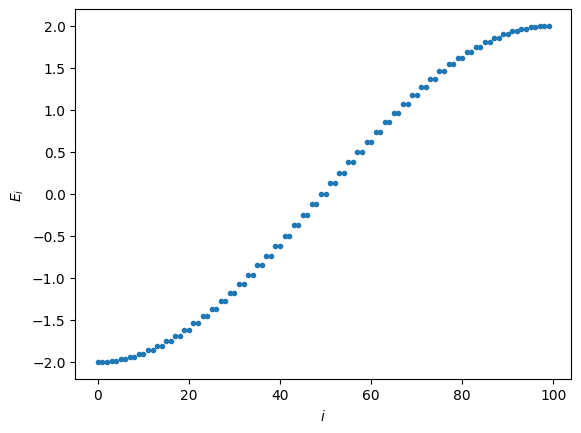

In [ ]:
plt.plot(evals, '.')
plt.ylabel(r'$E_i$')
plt.xlabel(r'$i$')
plt.show()

This is the $E(k) = 2\cos(k)$ dispersion, but the spectrum doesn't know about momentum - it's just showing the sorted values of $E(k)$. The 2-fold degeneracy comes from spatial inversion symmetry: $k\leftrightarrow -k$

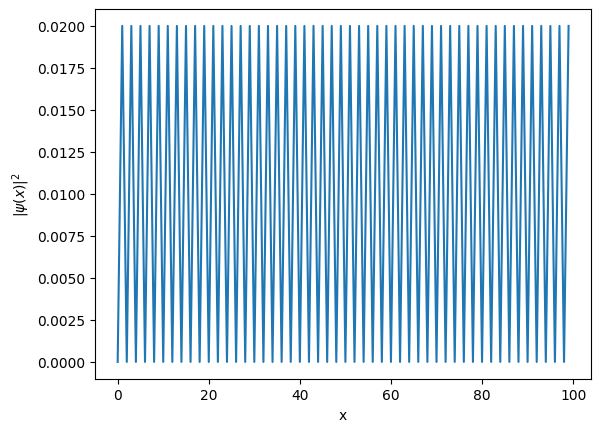

In [ ]:
psi = evecs[:,L//2] # some eigenvector in the middle of the spectrum
plt.plot(np.abs(psi)**2)
plt.xlabel('x')
plt.ylabel(r'$ |\psi(x)|^2$')
plt.show()

Let's also plot the general dispersion relation

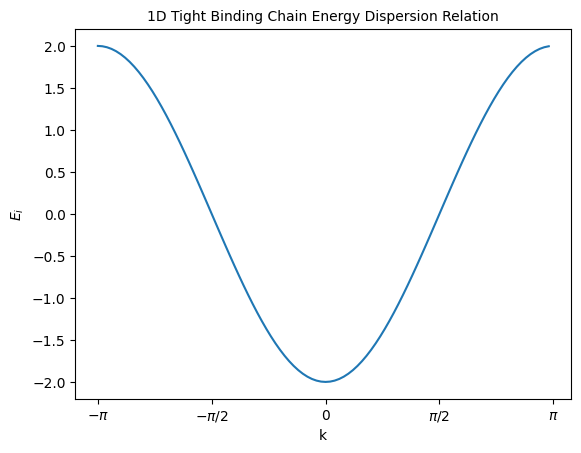

In [ ]:
# 1D chain tight binding energy dispersion relation
ka = k = np.linspace(-np.pi, np.pi, L, endpoint=False)
E = -2 * np.cos(ka)

plt.plot(ka, E, '-')
plt.ylabel(r'$E_i$')
plt.xlabel('k')

# set x axis in terms of multiples of pi
xticks_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
xticks_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
plt.xticks(xticks_positions, xticks_labels)

plt.title('1D Tight Binding Chain Energy Dispersion Relation', fontsize=10)
plt.show()

### Adding Disorder

In [ ]:
L = 100 # n. of sites
W = 5. # disorder strength
H = np.zeros((L,L), dtype = complex) # Hamiltonian
for i in range(L):
  j = (i+1) % L # neighbor site, with periodic boundary conditions
  H[i,j] = H[j,i] = 1 # hopping amplitude
  eps_i = W * (2*np.random.rand() - 1.) # random on-site energy
  H[i,i] = eps_i
evals, evecs = np.linalg.eigh(H) # diagonalize a Hermitian matrix

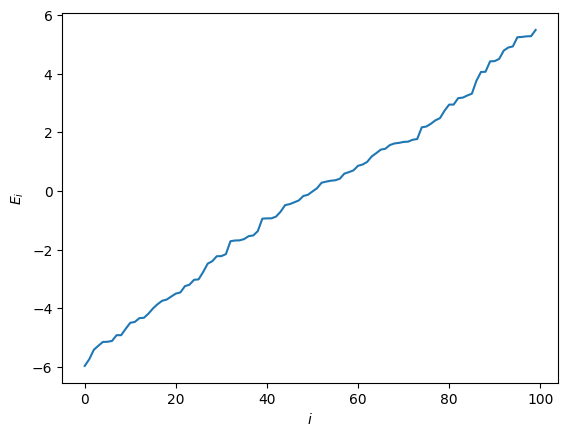

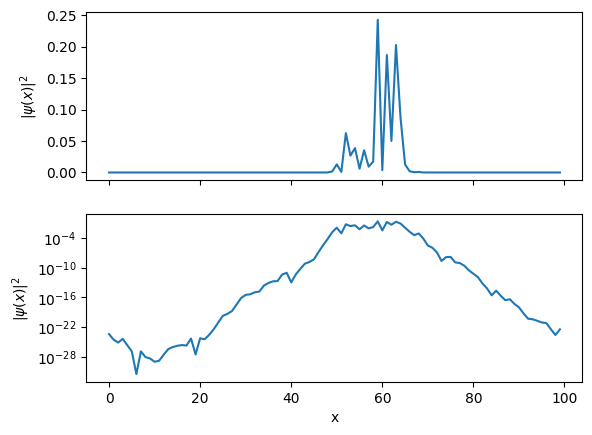

In [ ]:
plt.plot(evals)
plt.ylabel(r'$E_i$')
plt.xlabel(r'$i$')
plt.show()

print()

psi = evecs[:,L//2] # some eigenvector in the middle of the spectrum
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(np.abs(psi)**2)
ax[1].semilogy(np.abs(psi)**2)
ax[1].set_xlabel('x')
ax[0].set_ylabel(r'$ |\psi(x)|^2$')
ax[1].set_ylabel(r'$ |\psi(x)|^2$')
plt.show()

We get exponentially localized wavefuntions.

An easy estimate of the localization length is given by the "participation ratio":
$$ IPR = \frac{(\sum_x |\psi(x)|^2)^2}{ \sum_x |\psi(x)|^4}$$
(numerator is not necessary if wavefunctions are normalized)

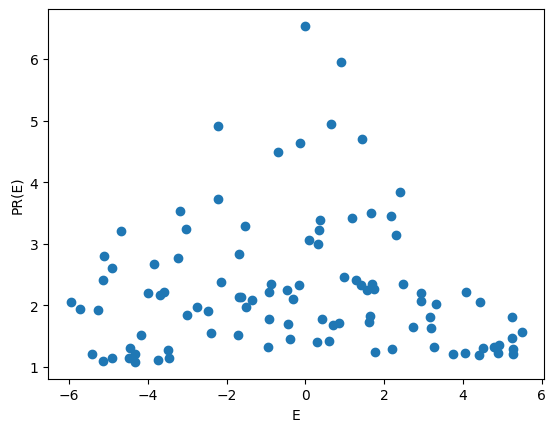

In [ ]:
PR = 1./np.sum(np.abs(evecs)**4, axis=0) # 'evecs' is a matrix of $\psi_i(x)$ amplitudes, 1st axis is x. This does the sum over x.
plt.plot(evals, PR, 'o')
plt.xlabel('E')
plt.ylabel('PR(E)')
plt.show()

# 2D Square Lattice

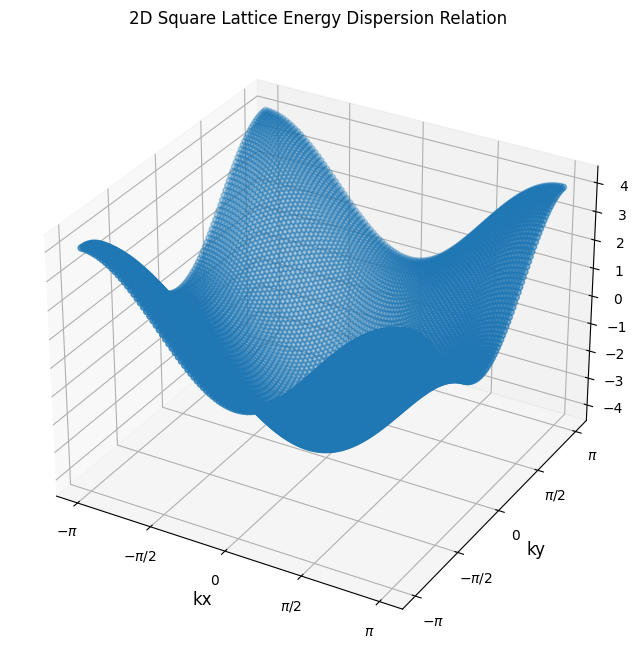

In [ ]:
# 2D square lattice tight binding energy dispersion relation

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

k_x = k = np.linspace(-np.pi, np.pi, L)
k_y = k = np.linspace(-np.pi, np.pi, L)
kx, ky = np.meshgrid(k_x, k_y)

E = -2 * (np.cos(kx) + np.cos(ky))

ax.scatter(kx, ky, E)

ax.set_xlabel('kx', fontsize=12)
ax.set_ylabel('ky', fontsize=12)
ax.set_zlabel(r'$E_i$', fontsize=12)
ax.set_title('2D Square Lattice Energy Dispersion Relation', fontsize=12)

# set y axis in terms of multiples of pi
yticks_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
yticks_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
plt.yticks(yticks_positions, yticks_labels)

# set x axis in terms of multiples of pi
xticks_positions = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
xticks_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
plt.xticks(xticks_positions, xticks_labels)
plt.grid(False)
#plt.tight_layout()
plt.show()

In [ ]:
# there will be four nearest neighbors since there can be hopping in the x and y directions
# before there were 100 sites along one direction, and the matrix representation of the hamiltonian became
# l x l --- here I think we want to factor in that there are 100 sites in two directions
# periodic boundary conditions apply in both dimensions

# each element of the L^2 by l^2 matrix will be of the form (i,j)

L = 100 # lattice sites
t = 1 # hopping amplitude

H = np.zeros((L*L, L*L), dtype= complex) # initialize hamiltonian

# populate hamiltonian matrix

for i, j in np.ndindex((L, L)):
    n = i * L + j # map 2D array into 1D array - this formula is useful since we are working with a 2D lattice and need to perform computations

    # Vertical hopping
    m = ((i + 1) % L) * L + j
    H[n, m] = t

    # Horizontal hopping
    m = i * L + (j + 1) % L
    H[n, m] = t

# symmetrize the hamiltonian matrix via transpose

H = H + H.T

print(H) # just to check the hamiltonian

evals_sq, evecs_sq = np.linalg.eigh(H) # diagonalize the (hermitian) matrix

# plot eigenvalue spectrum
plt.plot(evals_sq, '.')
plt.ylabel(r'$E_i$')
plt.xlabel(r'$i$')
plt.show()

# plot eigenvector
psi = evecs_sq[:,L//2] # some eigenvector in the middle of the spectrum
plt.plot(np.abs(psi)**2)
plt.xlabel('x')
plt.ylabel(r'$ |\psi(x)|^2$')
plt.show()

We can also separate the above code into functions --- I already set the plotting functions at the top of the notebook so I will just call them. This is useful for efficiency, especially when we want to generalize this sort of code.

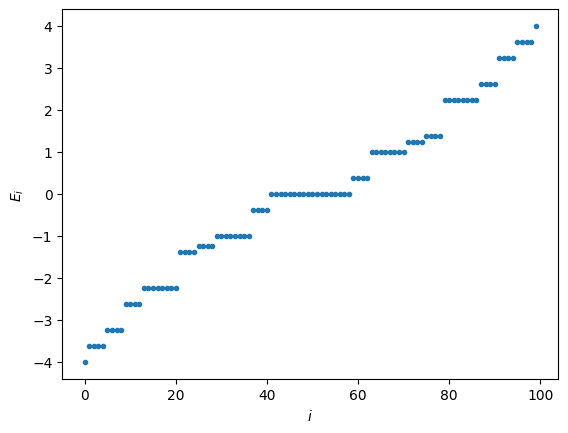

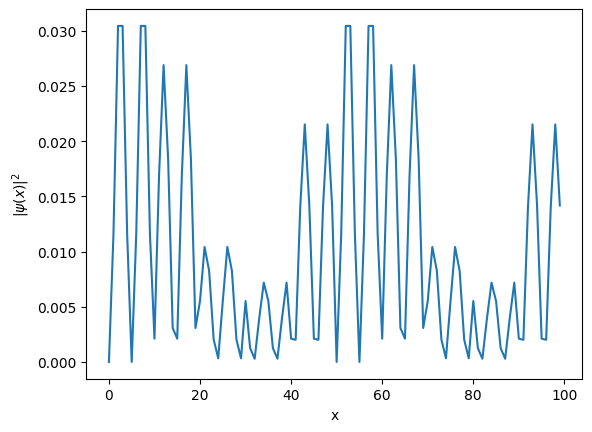

In [ ]:
def hamiltonian_setter(ham,i,j):
  # populate the hamiltonian matrix
    n = i * L + j
    # Vertical hopping
    m = ((i + 1) % L) * L + j
    ham[n, m] = t

    # Horizontal hopping
    m = i * L + (j + 1) % L
    ham[n, m] = t
    return ham

# using the functions
L = 10
t = 1
H = np.zeros((L*L, L*L), dtype= complex) # initialize hamiltonian

# we want to iterate through i and j
for i, j in np.ndindex((L, L)):
  H = hamiltonian_setter(H,i,j)
H = H + H.T # symmetrize
evals, evecs = np.linalg.eigh(H)
plot_evals(evals)
print()
plot_evec(L, evecs)

### Adding Disorder

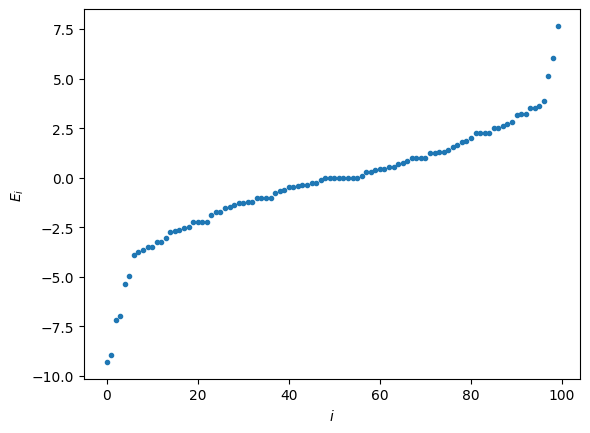

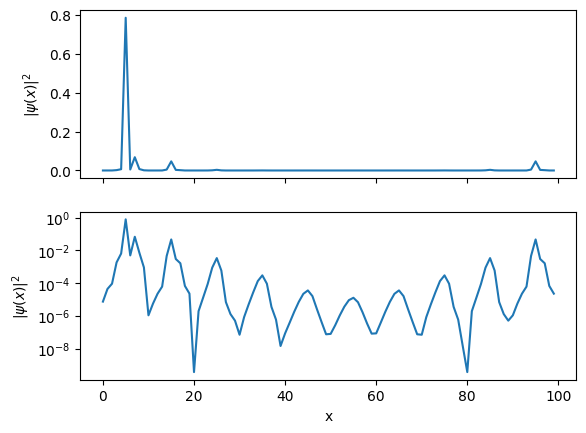

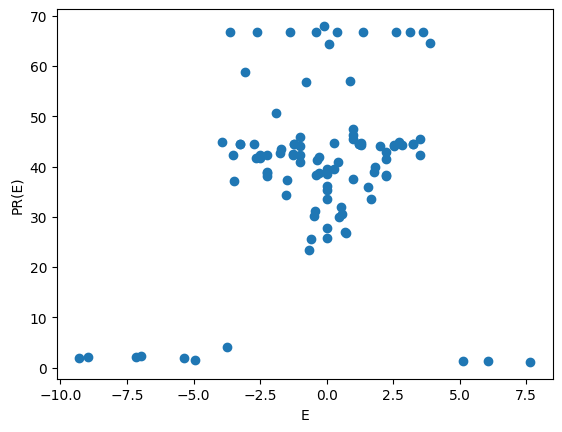

In [ ]:
L = 10
W = 5. # disorder parameter
t = 1

H = np.zeros((L*L, L*L), dtype= complex) # initialize hamiltonian

# populate hamiltonian matrix

for i, j in np.ndindex((L, L)):

  n = i*L + j

  # horizontal
  m = ((i+1) % L)*L + j
  H[n,m] = t

  # vertical
  m = i*L + ((j+1) % L)
  H[n,m] = t

  eps_i = W * (2*np.random.rand() - 1.) # random on-site energy
  H[i,i] = eps_i

H = H + H.T
evals, evecs = np.linalg.eigh(H) # diagonalize a Hermitian matrix

plot_evals(evals)
print()
plot_evec_disorder(L, evecs)
print()
plot_pr(evecs, evals)

### Object Oriented Programming Approach

Another way to make things more efficient and/or generalizable would be to make a Hamiltonian class. This is sort of the approach the developers of HofstaderTools used --- lots of object oriented programming. It's hard to say what the advantages or disadvantages of this will be since this is a much more simple problem compared to what we're trying to do, but having some groundwork done is useful.

In [ ]:
class Square_Hamiltonian:
    # making the 2D square lattice hamiltonian into a class --- all the functions from before are within it

    def __init__(self, length, t, disorder):
        self.L = length  # set hamiltonian dimensions
        self.matrix = np.zeros((self.L * self.L, self.L * self.L), dtype=complex)  # initialize hamiltonian matrix
        self.disorder = disorder  # set disorder parameter
        self.t = t

    def disorder_setter(self, i):
        # incorporate the disorder parameter into matrix elements
        eps_i = self.disorder * (2 * np.random.rand() - 1)  # random on-site energy
        self.matrix[i, i] = eps_i

    def hamiltonian_setter(self, i, j):
        n = i * self.L + j
        # Vertical hopping
        m = ((i + 1) % self.L) * self.L + j
        self.matrix[n, m] = self.t

        # Horizontal hopping
        m = i * self.L + (j + 1) % self.L
        self.matrix[n, m] = self.t

        if self.disorder != 0:
            self.disorder_setter(n)

    def construct_matrix(self):
        # we want to iterate through i and j
        for i, j in np.ndindex((self.L, self.L)):
            self.hamiltonian_setter(i, j)

        self.H = self.matrix + self.matrix.T  # symmetrize
        self.evals, self.evecs = np.linalg.eigh(self.H)  # calculate eigenvalues and eigenvectors

    def plot_evals(self):
        # plot eigenvalues of hamiltonian matrix
        plt.plot(self.evals, '.')
        plt.ylabel(r'$E_i$')
        plt.xlabel(r'$i$')
        plt.show()

    def plot_evec(self):
        # plot an eigenvector
        self.psi = self.evecs[:,self.L//2] # some eigenvector in the middle of the spectrum
        plt.plot(np.abs(self.psi)**2)
        plt.xlabel('x')
        plt.ylabel(r'$ |\psi(x)|^2$')
        plt.show()

    def plot_evec_disorder(self):
        self.psi = self.evecs[:,self.L//2] # some eigenvector in the middle of the spectrum
        fig, ax = plt.subplots(2,1,sharex=True)
        ax[0].plot(np.abs(self.psi)**2)
        ax[1].semilogy(np.abs(self.psi)**2)
        ax[1].set_xlabel('x')
        ax[0].set_ylabel(r'$ |\psi(x)|^2$')
        ax[1].set_ylabel(r'$ |\psi(x)|^2$')
        plt.show()

    def plot_pr(self):
        self.PR = 1./np.sum(np.abs(self.evecs)**4, axis=0) # 'evecs' is a matrix of $\psi_i(x)$ amplitudes, 1st axis is x. This does the sum over x.
        plt.plot(self.evals, self.PR, 'o')
        plt.xlabel('E')
        plt.ylabel('PR(E)')
        plt.show()


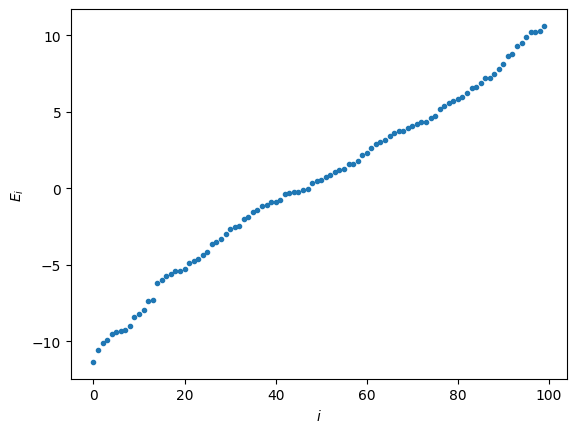

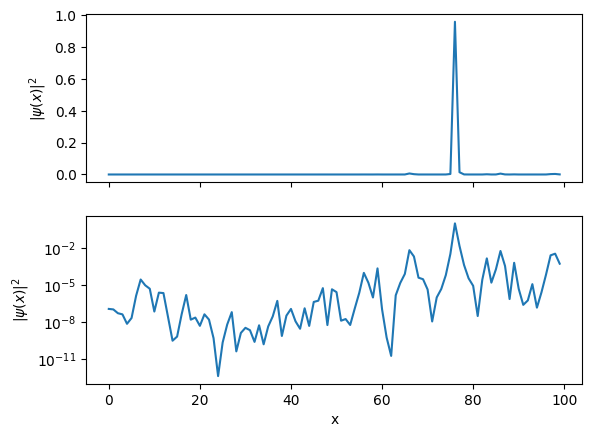

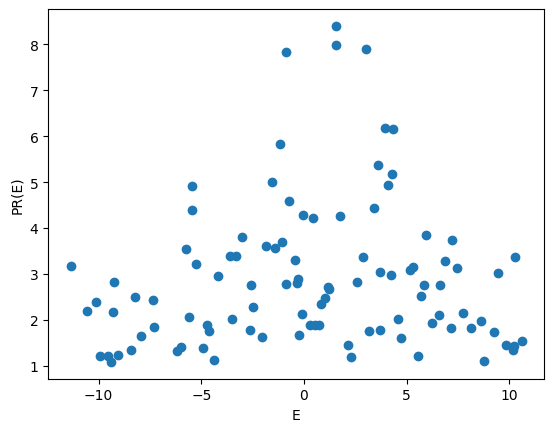

In [ ]:
# example usage with disorder
hamiltonian = Square_Hamiltonian(length=10 , t=1.0, disorder=5.)
hamiltonian.construct_matrix()
print()
hamiltonian.plot_evals()
print()
hamiltonian.plot_evec_disorder()
print()
hamiltonian.plot_pr()

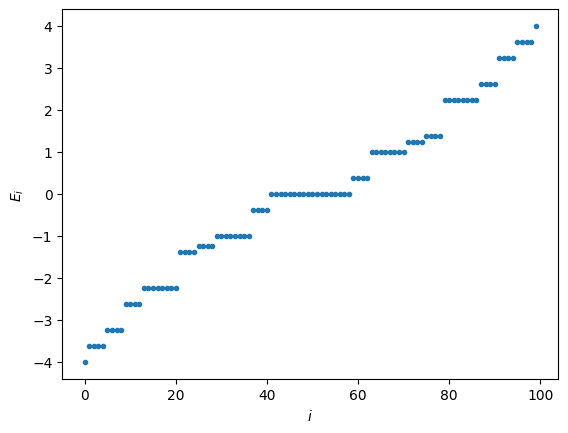

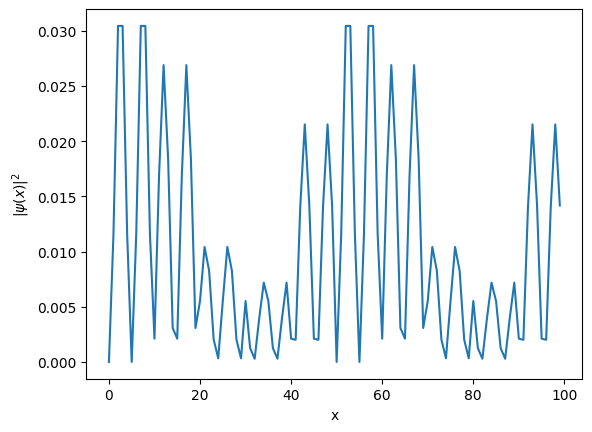

In [ ]:
# example usage without disorder
hamiltonian = Square_Hamiltonian(length=10 , t=1.0, disorder=0.)
hamiltonian.construct_matrix()
hamiltonian.plot_evals()
print()
hamiltonian.plot_evec()

# 3D Lattice

This first one should be a (simple?) cubic lattice. Not sure how to account for a body or face centered cubic lattice.

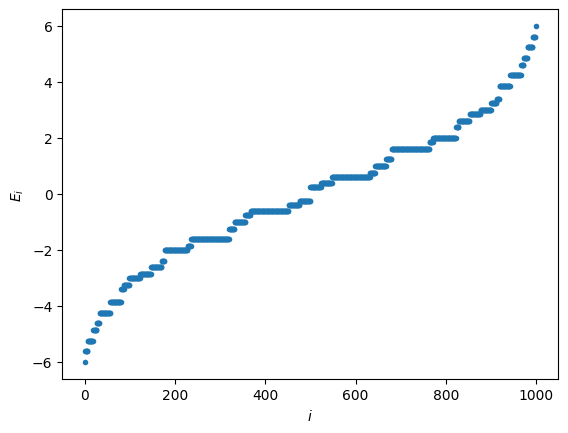

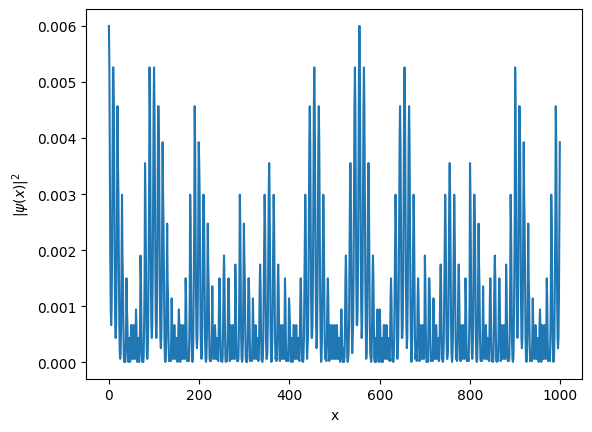

In [ ]:
# 3D cubic lattice
# l x l x l
# periodic boundary conditions apply in all dimensions

# each element of the L^3 by l^3 matrix will be of the form (i,j,k)

L = 10
t = 1

H = np.zeros((L*L*L, L*L*L), dtype= complex) # initialize hamiltonian
for i, j, k in np.ndindex((L, L, L)):
        n = i*(L*L) + j*L + k

        # x direction hopping
        m = ((i+1) % L)*(L*L) + j*L + k
        H[n,m] = t # hopping amplitude

        # y direction hopping
        m = i*(L*L) + ((j+1) % L)*L + k
        H[n,m] = t # hopping amplitude

        # z direction hopping
        m = i*(L*L) + j*L + (k+1) % L
        H[n,m] = t # hopping amplitude


H = H + H.T
evals, evecs = np.linalg.eigh(H) # diagonalize a Hermitian matrix
plot_evals(evals)
print()
plot_evec(L, evecs)

Wondered if making a 3D plot would help ---- honestly not sure how accurate all this is

In [ ]:
# reshape the eigenvalues to a 3D grid
eigenvalue_grid = evals.reshape((L, L, L))

# create meshgrid
x, y, z = np.meshgrid(np.arange(L), np.arange(L), np.arange(L), indexing='ij')

# flatten grids and eigenvalues
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()
eigenvalues_flat = eigenvalue_grid.flatten()

# create interactive plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_flat,
    y=y_flat,
    z=z_flat,
    mode='markers',
    marker=dict(
        size=5,
        color=eigenvalues_flat,
        colorscale='Viridis',
        colorbar=dict(title='Eigenvalue'),
    )
)])

fig.update_layout(
    title='3D Cubic Lattice Eigenvalue Spectrum',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    )
)

fig.show()

### Adding Disorder

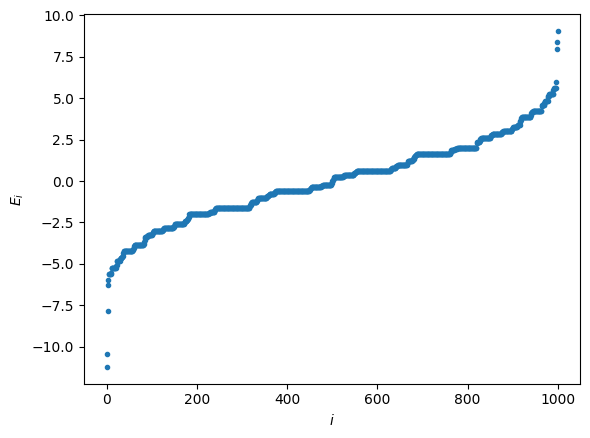

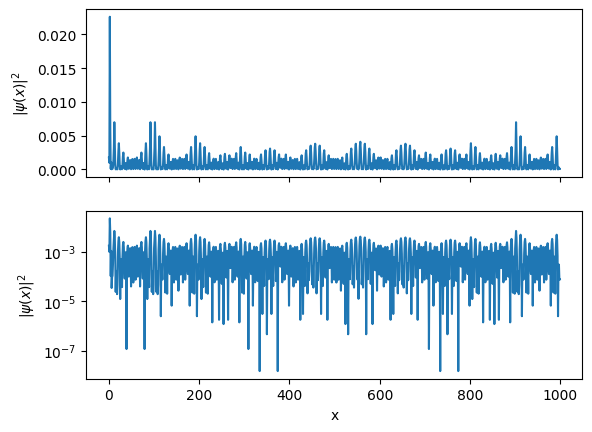

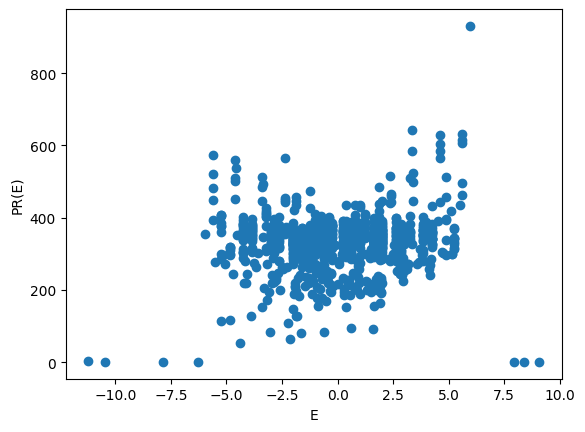

In [ ]:
# 3D cubic lattice with disorder
# l x l x l
# periodic boundary conditions apply in all dimensions

# each element of the L^3 by l^3 matrix will be of the form (i,j,k)

L = 10
W = 5.
t = 1

H = np.zeros((L*L*L, L*L*L), dtype= complex) # initialize hamiltonian
for i, j, k in np.ndindex((L, L, L)):
        n = i*(L*L) + j*L + k

        # x direction hopping
        m = ((i+1) % L)*(L*L) + j*L + k
        H[n,m] = t # hopping amplitude

        # y direction hopping
        m = i*(L*L) + ((j+1) % L)*L + k
        H[n,m] = t # hopping amplitude

        # z direction hopping
        m = i*(L*L) + j*L + (k+1) % L
        H[n,m] = t # hopping amplitude

        eps_i = W * (2*np.random.rand() - 1.) # random on-site energy
        H[i,i] = eps_i


H = H + H.T
evals, evecs = np.linalg.eigh(H) # diagonalize a Hermitian matrix

plot_evals(evals)
print()
plot_evec_disorder(L, evecs)
print()
plot_pr(evecs, evals)

# 2D Honeycomb Lattice

The way I want to do this is by representing the hamiltonian in terms of four blocks based on the A and B lattice sites. $$𝐇=\begin{pmatrix}
AA & AB\\
BA & BB
\end{pmatrix}$$
The unit cell is two interpenetrated triangular lattices. If I start from an A site, there are three nearest neighbors which are all B sites and vice versa.

In [ ]:
# for a honeycomb lattice
L = 3 # lattice sites
t = 1 # hopping amplitude
# keeping to periodic boundary conditions
# the AA and BB blocks should be zeros for now since I'm not playing around with different on-site potentials
AA = np.zeros((L, L), dtype= complex) # AA block
BB = np.zeros((L, L), dtype= complex) # BB block

# now I want to populate the matrixes corresponding to the AB and BA blocks using seperate functions

def AB_block(L, t):
  AB = np.zeros((L, L), dtype= complex) # initialize AB
  for i, j in np.ndindex((L, L)):
  # Vertical hopping: Connect (i, j) to (i + 1, j) if (i + j) % 2 == 0 (ie if the sum of indices is even since the remainder is zero)
    if (i + j) % 2 == 0:
      m = (i + 1) % L
      AB[i, j] = t

    # Horizontal hopping: Connect (i, j) to (i, j + 1)
    m = (j + 1) % L
    AB[i, m] = t

  return AB

def BA_block(L,t):
  return AB_block(L, t).T.conjugate()

AB = AB_block(L,t)
BA = BA_block(L,t)
# construct complete hamiltonian using the four blocks

upper = np.concatenate((AA, AB), axis=1)
lower = np.concatenate((BA, BB), axis=1)
H = np.concatenate((upper, lower), axis=0)
print(H) # just to check the hamiltonian

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.-0.j 1.-0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.-0.j 1.-0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.-0.j 1.-0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]]


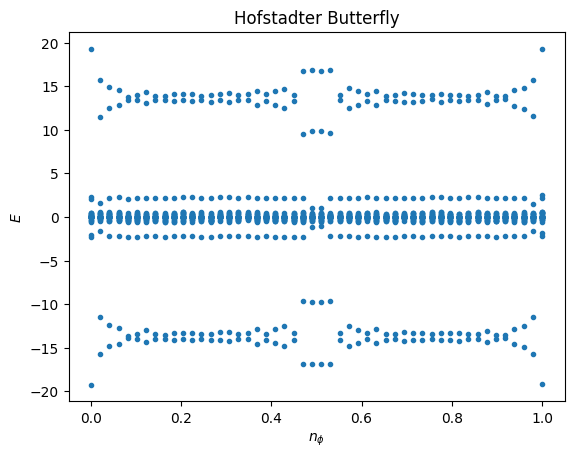

In [ ]:
class Honeycomb_Hamiltonian:
    """ Honeycomb lattice Hamiltonian class """
    def __init__(self, length: int, t: float, disorder: float, phi: float):
        self.L = length  # Set Hamiltonian dimensions
        self.t = t  # Set hopping amplitude
        self.phi = phi  # Set magnetic field parameter
        self.disorder = disorder  # Set disorder parameter
        self.AA = np.zeros((self.L, self.L), dtype=complex)  # AA block
        self.BB = np.zeros((self.L, self.L), dtype=complex)  # BB block

    def disorder_setter(self):
        """Incorporate disorder into matrix elements."""
        for i in range(self.L):
            eps_i = self.disorder * (2 * np.random.rand() - 1)  # Random on-site energy
            self.AA[i, i] = eps_i  # Apply disorder to AA block

    def AB_block(self):
        """Construct the AB block with hopping and magnetic phase."""
        AB = np.zeros((self.L, self.L), dtype=complex)
        for i in range(self.L):
            for j in range(self.L):
                if (i + j) % 2 == 0:
                    if i + 1 < self.L:
                        AB[i, (j + 1) % self.L] = self.t  # Horizontal hopping
                    if j + 1 < self.L:
                        B = np.exp(1j * 2 * np.pi * self.phi * i)
                        AB[i, j] = self.t * B  # Vertical hopping with phase
        return AB

    def construct_matrix(self):
        """Construct the full Hamiltonian matrix."""
        self.disorder_setter()  # Set disorder
        AB = self.AB_block()
        BA = AB.T.conjugate()  # Transpose conjugate for BA block
        upper = np.concatenate((self.AA, AB), axis=1)
        lower = np.concatenate((BA, self.BB), axis=1)
        H = np.concatenate((upper, lower), axis=0)
        evals = np.linalg.eigh(H)[0]  # Return eigenvalues
        return evals

def butterfly(length: int, t: float, disorder: float, phi: float, q: int):
    """Plot the Hofstadter butterfly."""
    model = Honeycomb_Hamiltonian(length, t, disorder, phi)
    n_phi_values = np.linspace(0, 1, q)

    data = {
        'nphi_list': [],
        'E_list': [],
    }

    for n_phi in n_phi_values:
        model.phi = n_phi  # Update phi for the current n_phi
        evals = model.construct_matrix()  # Calculate eigenvalues for each n_phi
        data['nphi_list'].extend([n_phi] * len(evals))  # Repeat n_phi for each eigenvalue
        data['E_list'].extend(evals)  # Append all eigenvalues

    data['nphi_list'] = np.array(data['nphi_list'])
    data['E_list'] = np.array(data['E_list'])

    if len(data['nphi_list']) != len(data['E_list']):
        raise ValueError("nphi_list and E_list must be the same size before plotting.")

    plt.figure()
    plt.scatter(data['nphi_list'], data['E_list'], marker='.')
    plt.title("Hofstadter Butterfly")
    plt.xlabel("$n_\\phi$")
    plt.ylabel("$E$")
    plt.show()

# Run the butterfly function with specified parameters
butterfly(length=20, t=1.0, disorder=0.6, phi=0.5, q=50)

In [ ]:
from math import gcd
class Honeycomb_Hamiltonian:
    """ Honeycomb lattice Hamiltonian class """
    def __init__(self, length: int, t: float, disorder: float, phi: float):
        self.L = length  # Set Hamiltonian dimensions
        self.matrix = np.zeros((self.L * self.L, self.L * self.L), dtype=complex)  # Initialize Hamiltonian matrix
        self.disorder = disorder  # Set disorder parameter
        self.t = t  # Set hopping amplitude
        self.phi = phi  # Set magnetic field parameter
        self.AA = np.zeros((self.L, self.L), dtype=complex)  # AA block
        self.BB = np.zeros((self.L, self.L), dtype=complex)  # BB block

    def disorder_setter(self, i):
        # Incorporate the disorder parameter into matrix elements
        eps_i = self.disorder * (2 * np.random.rand() - 1)  # Random on-site energy
        self.AB[i, i] = eps_i

    def AB_block(self):
        self.AB = np.zeros((self.L, self.L), dtype=complex)  # Initialize AB block
        for i, j in np.ndindex((self.L, self.L)):
            # Vertical hopping: Connect (i, j) to (i + 1, j) if (i + j) % 2 == 0
            if (i + j) % 2 == 0:
                m = (i + 1) % self.L
                self.AB[i, j] = self.t

            # Horizontal hopping: Connect (i, j) to (i, j + 1)
            m = (j + 1) % self.L
            self.AB[i, m] = self.t

            # Apply phase factor for magnetic flux
            if j < self.L - 1:  # Only apply phase if not on the last column
                B = np.exp(1j * 2 * np.pi * (self.phi) * i)
                self.AB[i, m] *= B  # Apply phase

            # Apply disorder if specified
            if self.disorder != 0:
                self.disorder_setter(i)

        return self.AB

    def BA_block(self):
        return self.AB_block().T.conjugate()

    def construct_matrix(self):
        # Combine blocks to form the Hamiltonian
        self.AB = self.AB_block()
        self.BA = self.BA_block()
        self.upper = np.concatenate((self.AA, self.AB), axis=1)
        self.lower = np.concatenate((self.BA, self.BB), axis=1)
        self.H = np.concatenate((self.upper, self.lower), axis=0)
        self.evals, self.evecs = np.linalg.eigh(self.H)  # Calculate eigenvalues and eigenvectors

        """ basic plotting functions """

    def plot_evals(self):
        # Plot eigenvalues of hamiltonian matrix
        plt.plot(self.evals, '.')
        plt.ylabel(r'$E_i$')
        plt.xlabel(r'$i$')
        plt.show()

    def plot_evec(self):
        # Plot an eigenvector
        self.psi = self.evecs[:,self.L//2] # Some eigenvector in the middle of the spectrum
        plt.plot(np.abs(self.psi)**2)
        plt.xlabel('x')
        plt.ylabel(r'$ |\psi(x)|^2$')
        plt.show()

    def plot_evec_disorder(self):
        # Plot an eigenvector supposing disorder exists
        self.psi = self.evecs[:,self.L//2]
        fig, ax = plt.subplots(2,1,sharex=True)
        ax[0].plot(np.abs(self.psi)**2)
        ax[1].semilogy(np.abs(self.psi)**2)
        ax[1].set_xlabel('x')
        ax[0].set_ylabel(r'$ |\psi(x)|^2$')
        ax[1].set_ylabel(r'$ |\psi(x)|^2$')
        plt.show()

    def plot_pr(self):
        self.PR = 1./np.sum(np.abs(self.evecs)**4, axis=0) # 'evecs' is a matrix of $\psi_i(x)$ amplitudes, 1st axis is x. This does the sum over x.
        plt.plot(self.evals, self.PR, 'o')
        plt.xlabel('E')
        plt.ylabel('PR(E)')
        plt.show()

    """ plot butterfly"""
    def plot_butterfly(self):
        plt.figure(figsize=(8, 6))
        for p in range(1, self.L + 1):
            for q in range(p + 1, self.L + 1):
                if gcd(p, q) == 1:
                    nphi = p / q
                    self.phi = nphi  # Set magnetic flux
                    self.construct_matrix()  # Rebuild Hamiltonian for each (p,q)
                    # Plot each energy level for the given phi
                    plt.plot(np.full_like(self.evals, nphi), self.evals,'o', c="black", markersize=0.5)

        # Plot title and labels
        plt.xlabel(r'$\phi$', fontsize=15)
        plt.ylabel(r'$E$', fontsize=15)
        plt.title(r'Hofstadter Butterfly for $L=' + str(self.L) + '$', fontsize=15)
        plt.grid()
        plt.show()

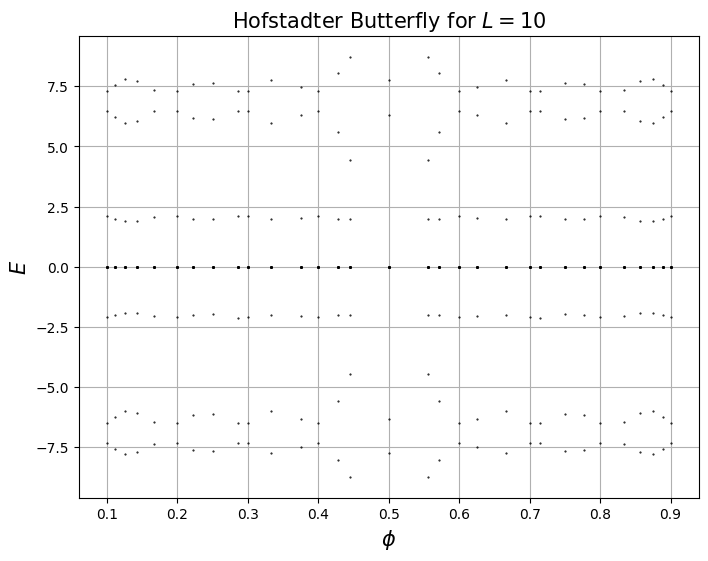

In [ ]:
honeycomb = Honeycomb_Hamiltonian(length=10, t=1.0, disorder=0., phi=0.5)

# Plot the Hofstadter butterfly
honeycomb.plot_butterfly()

#Adding the Magnetic Field

I want to think of the magnetic field in terms of a second lattice structure overlayed onto the primary lattice structure such that it interacts with the magnetic field. When it comes to adapting the object-oriented programming approach, I want to build a function that involves the magnetic field aspect and feed it into the established function that sets the hamiltonian. This way, I'm basically building both 'lattices' simultaenously. The latter function should be fed into one that iterates through each matrix element and actually builds the hamiltonian.

I want there to be a phase term associated with each horizontal hopping that alternates in sign.

[[ 0. +0.0000000e+00j  0.5+0.0000000e+00j  0. +0.0000000e+00j ...
   0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j]
 [ 0.5+0.0000000e+00j  0. +0.0000000e+00j  0.5+0.0000000e+00j ...
   0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j]
 [ 0. +0.0000000e+00j  0.5+0.0000000e+00j  0. +0.0000000e+00j ...
   0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j]
 ...
 [ 0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j ...
   0. +0.0000000e+00j -0.5+5.5109106e-16j  0. +0.0000000e+00j]
 [ 0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j ...
  -0.5-5.5109106e-16j  0. +0.0000000e+00j -0.5+5.5109106e-16j]
 [ 0. +0.0000000e+00j  0. +0.0000000e+00j  0. +0.0000000e+00j ...
   0. +0.0000000e+00j -0.5-5.5109106e-16j  0. +0.0000000e+00j]]


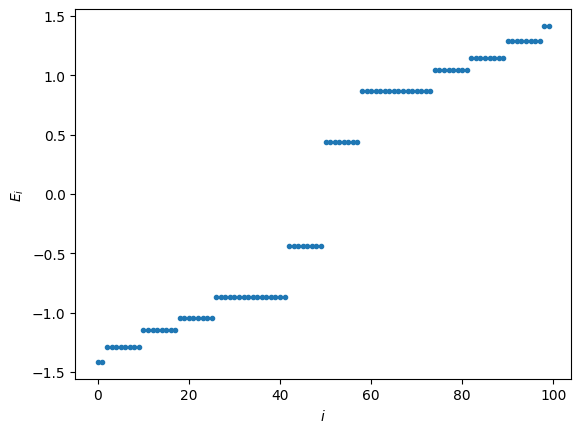

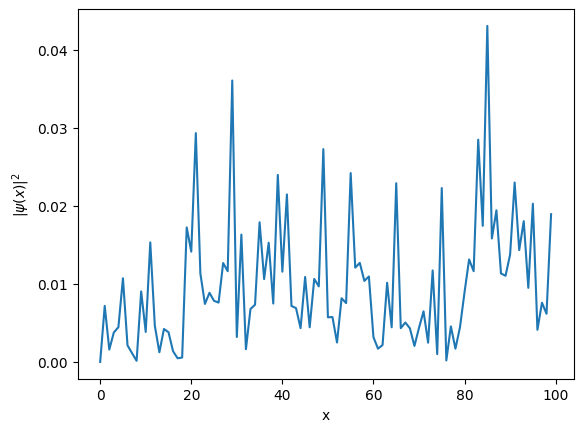

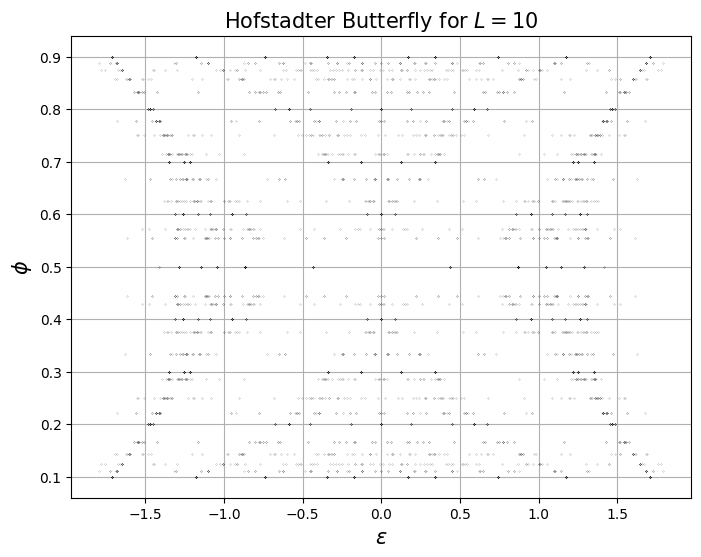

In [ ]:
L = 10 # lattice sites
t = 1 # hopping amplitude
phi = 1/2 # flux density
H = np.zeros((L*L, L*L), dtype= complex) # initialize hamiltonian

# populate hamiltonian matrix

for i, j in np.ndindex((L, L)):
    n = i * L + j # map 2D array into 1D array - this formula is useful since we are working with a 2D lattice and need to perform computations

    # Vertical hopping
    m = ((i + 1) % L) * L + j
    H[n, m] = t

    # Horizontal hopping - this is where the phase change term is picked up
    m = i * L + (j + 1) % L
    # B = np.exp(1j*phi*L) * np.exp(-1j*phi) did not work since we want i dependency
    B = np.exp(1j * 2 * np.pi * phi * i)
    H[n, m] = B*t
# symmetrize the hamiltonian matrix via conjugate transpose

H = (H + H.T.conj()) / 2

print(H) # just to check the hamiltonian

evals_sq, evecs_sq = np.linalg.eigh(H) # diagonalize the (hermitian) matrix

# plot eigenvalue spectrum
plt.plot(evals_sq, '.')
plt.ylabel(r'$E_i$')
plt.xlabel(r'$i$')
plt.show()

# plot eigenvector
psi = evecs_sq[:,L//2] # some eigenvector in the middle of the spectrum
plt.plot(np.abs(psi)**2)
plt.xlabel('x')
plt.ylabel(r'$ |\psi(x)|^2$')
plt.show()

# A gcd function to set irrational values for phi
def gcd(a, b):
    if b == 0:
        return a
    return gcd(b, a % b)

# Plot the Hofstadter butterfly
plt.figure(figsize=(8, 6))
for p in range(1, L + 1):
    for q in range(1, L + 1):
        if q > p and gcd(p, q) == 1:
            nphi = p / q

            # Rebuild Hamiltonian for each (p, q)
            H = np.zeros((L * L, L * L), dtype=complex)

            for i, j in np.ndindex((L, L)):
                n = i * L + j  # map 2D array into 1D array
                # Vertical hopping
                m = ((i + 1) % L) * L + j
                H[n, m] = t
                # Horizontal hopping with phase
                m = i * L + (j + 1) % L
                B = np.exp(1j * 2 * np.pi * nphi * i)
                H[n, m] = B * t

            # Symmetrize the Hamiltonian matrix
            H = (H + H.T.conj()) / 2

            # Eigenvalues of the Hamiltonian
            eigenvals = np.linalg.eigvalsh(H)

            # Plot each energy level for the given phi
            plt.plot(eigenvals, np.full_like(eigenvals, nphi), 'o', c="black", markersize=0.1)

# Plot title and labels
plt.xlabel(r'$\epsilon$', fontsize=15)
plt.ylabel(r'$\phi$', fontsize=15)
plt.title(r'Hofstadter Butterfly for $L=' + str(L) + '$', fontsize=15)
plt.grid()
plt.show()

Using the square lattice and it's hofstader model, we want to calculate a few key things. This will become relevant for the hyperbolic case later. We specifically want to consider the lower energy band in the hofstader butterfly above and truncate the calculations so that we look at only the strongly anderson localized electrons (these are higher energy). In other words, we want to only consider the effect of disorder on the lower band.

In [ ]:
from math import gcd
class Square_Hamiltonian:
    """ Square lattice hamiltonian class """
    def __init__(self, length: int, t: float, disorder: float, phi: float):
        self.L = length  # set hamiltonian dimensions
        self.matrix = np.zeros((self.L * self.L, self.L * self.L), dtype=complex)  # initialize hamiltonian matrix
        self.disorder = disorder  # set disorder parameter
        self.t = t
        self.phi = phi

    def disorder_setter(self, i):
        # incorporate the disorder parameter into matrix elements
        eps_i = self.disorder * (2 * np.random.rand() - 1)  # random on-site energy
        self.matrix[i, i] = eps_i

    def hamiltonian_setter(self, i, j, phi=None):
        n = i * self.L + j
        # Vertical hopping
        m = ((i + 1) % self.L) * self.L + j
        self.matrix[n, m] = self.t

        # Horizontal hopping
        m = i * self.L + (j + 1) % self.L

        B = np.exp(1j * 2 * np.pi * (self.phi if phi is None else phi) * i)
        self.matrix[n, m] = B * self.t

        if self.disorder != 0:
            self.disorder_setter(n)


    def construct_matrix(self, phi=None):
        # we want to iterate through i and j
        for i, j in np.ndindex((self.L, self.L)):
            self.hamiltonian_setter(i, j, phi)

        if self.phi != 0:
            self.H = (self.matrix + self.matrix.T.conj()) / 2 # symmetrize
        else:
            self.H = self.matrix + self.matrix.T  # symmetrize
        print(self.H)
        self.evals, self.evecs = np.linalg.eigh(self.H)  # calculate eigenvalues and eigenvectors

    """ basic plotting functions """

    def plot_evals(self):
        # plot eigenvalues of hamiltonian matrix
        plt.plot(self.evals, '.')
        plt.ylabel(r'$E_i$')
        plt.xlabel(r'$i$')
        plt.show()

    def plot_evec(self):
        # plot an eigenvector
        self.psi = self.evecs[:,self.L//2] # some eigenvector in the middle of the spectrum
        plt.plot(np.abs(self.psi)**2)
        plt.xlabel('x')
        plt.ylabel(r'$ |\psi(x)|^2$')
        plt.show()

    def plot_evec_disorder(self):
        self.psi = self.evecs[:,self.L//2] # some eigenvector in the middle of the spectrum
        fig, ax = plt.subplots(2,1,sharex=True)
        ax[0].plot(np.abs(self.psi)**2)
        ax[1].semilogy(np.abs(self.psi)**2)
        ax[1].set_xlabel('x')
        ax[0].set_ylabel(r'$ |\psi(x)|^2$')
        ax[1].set_ylabel(r'$ |\psi(x)|^2$')
        plt.show()

    def plot_pr(self):
        self.PR = 1./np.sum(np.abs(self.evecs)**4, axis=0) # 'evecs' is a matrix of $\psi_i(x)$ amplitudes, 1st axis is x. This does the sum over x.
        plt.plot(self.evals, self.PR, 'o')
        plt.xlabel('E')
        plt.ylabel('PR(E)')
        plt.show()

    """ hofstader butterfly support """
    # Plot the Hofstadter butterfly

    def plot_butterfly(self):
        plt.figure(figsize=(8, 6))
        for p in range(1, self.L + 1):
          for q in range(1, self.L + 1):
              if q > p and gcd(p, q) == 1:
                  nphi = p / q
                  self.construct_matrix(phi = nphi) # rebuild hamiltonian for each (p,q)
                  # Plot each energy level for the given phi
                  plt.plot(self.evals, np.full_like(self.evals, nphi), 'o', c="black", markersize=0.1)

        # Plot title and labels
        plt.xlabel(r'$\epsilon$', fontsize=15)
        plt.ylabel(r'$\phi$', fontsize=15)
        plt.title(r'Hofstadter Butterfly for $L=' + str(self.L) + '$', fontsize=15)
        plt.grid()
        plt.show()

    """ density of states """

    def gaussian_broadening(self, E, E_n, sigma):
        return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((E - E_n) ** 2) / (2 * sigma ** 2))

    # compute DOS
    def density_of_states(self):
        energy_range = (np.min(self.evals) - 1, np.max(self.evals) + 1)  # Define the range of energies
        sigma = 0.1  # Broadening parameter
        num_points = 1000  # points in the energy grid
        E_vals = np.linspace(energy_range[0], energy_range[1], num_points)
        dos = np.zeros_like(E_vals) # initializing both spaces

        # Sum over the contributions from each eigenvalue
        for E_n in self.evals:
            dos += self.gaussian_broadening(E_vals, E_n, sigma)

        # Plot the DOS
        plt.plot(E_vals, dos)
        plt.xlabel('Energy (E)')
        plt.ylabel('Density of States g(E)')
        plt.title('Density of States vs Energy')
        plt.show()


[[ 0.+0.00000000e+00j  1.+0.00000000e+00j  0.+0.00000000e+00j ...
   0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j]
 [ 1.+0.00000000e+00j  0.+0.00000000e+00j  1.+0.00000000e+00j ...
   0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j]
 [ 0.+0.00000000e+00j  1.+0.00000000e+00j  0.+0.00000000e+00j ...
   0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j]
 ...
 [ 0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j ...
   0.+0.00000000e+00j -1.+1.10218212e-15j  0.+0.00000000e+00j]
 [ 0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j ...
  -1.+1.10218212e-15j  0.+0.00000000e+00j -1.+1.10218212e-15j]
 [ 0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j ...
   0.+0.00000000e+00j -1.+1.10218212e-15j  0.+0.00000000e+00j]]
[[0.+0.00000000e+00j 1.+0.00000000e+00j 0.+0.00000000e+00j ...
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [1.+0.00000000e+00j 0.+0.00000000e+00j 1.+0.00000000e+00j ...
  0.+0.00000000e+00j 0.+0.00000000

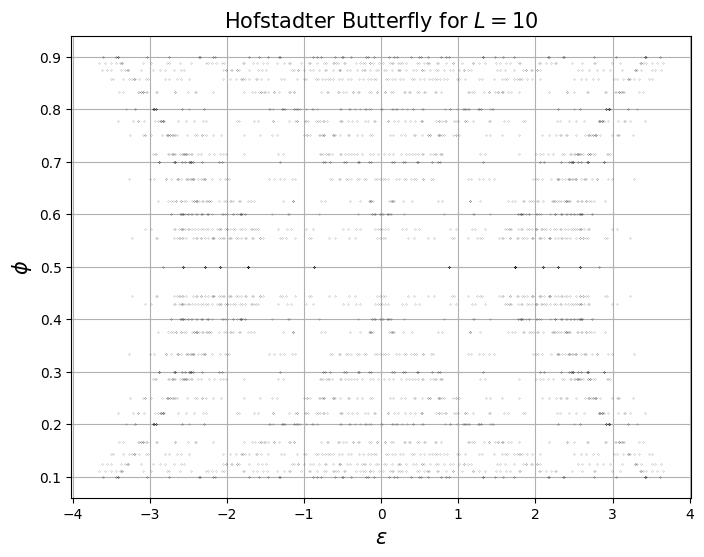

In [ ]:
hamiltonian = Square_Hamiltonian(length=10 , t=1.0, disorder=0.0 , phi= 0.0)
hamiltonian.plot_butterfly()

[[0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]]


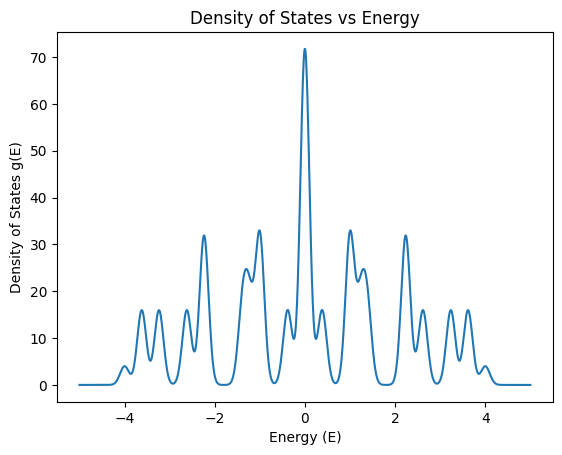

In [ ]:
# example usage with disorder
hamiltonian = Square_Hamiltonian(length=10 , t=1.0, disorder=0. , phi= 0.)
hamiltonian.construct_matrix()
hamiltonian.density_of_states()

In [ ]:
# thouless conductance
"The longitudinal conductance of a finite system can be related to the sensitivity of eigenenergies to changes in the boundary conditions"

'The longitudinal conductance of a finite system can be related to the sensitivity of eigenenergies to changes in the boundary conditions'

calculate thouless conductance, hall conductance, density of states
then try to build in the projection states to reduce higher dimensional problems

[[0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]]


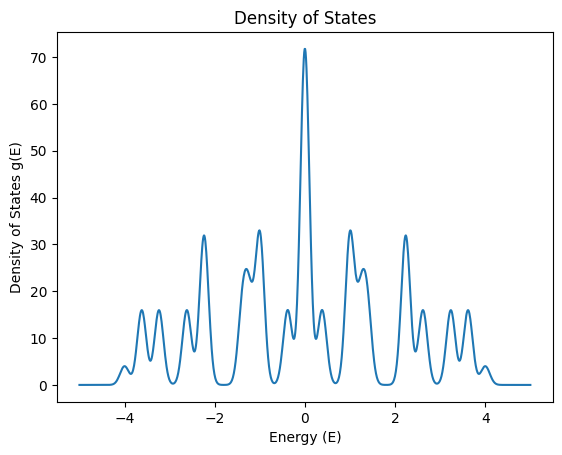

In [ ]:
# density of states

L = 10 # lattice sites
t = 1 # hopping amplitude

H = np.zeros((L*L, L*L), dtype= complex) # initialize hamiltonian

# populate hamiltonian matrix

for i, j in np.ndindex((L, L)):
    n = i * L + j # map 2D array into 1D array - this formula is useful since we are working with a 2D lattice and need to perform computations

    # Vertical hopping
    m = ((i + 1) % L) * L + j
    H[n, m] = t

    # Horizontal hopping
    m = i * L + (j + 1) % L
    H[n, m] = t

# symmetrize the hamiltonian matrix via transpose

H = H + H.T

print(H) # just to check the hamiltonian

evals, evecs = np.linalg.eigh(H) # diagonalize the (hermitian) matrix

# I could've taken the histogram approach but I wanted the density of states as a function of the energies and a source I read said to
# replace the delta function with a gaussian
# Gaussian broadening function
def gaussian_broadening(E, E_n, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((E - E_n) ** 2) / (2 * sigma ** 2))

# compute DOS
def density_of_states(evals):
    energy_range = (np.min(evals) - 1, np.max(evals) + 1)  # Define the range of energies
    sigma = 0.1  # Broadening parameter
    num_points = 1000  # points in the energy grid
    E_vals = np.linspace(energy_range[0], energy_range[1], num_points)
    dos = np.zeros_like(E_vals) # initializing both spaces

    # Sum over the contributions from each eigenvalue
    for E_n in evals:
        dos += gaussian_broadening(E_vals, E_n, sigma)

    # Plot the DOS
    plt.plot(E_vals, dos, label="Density of States vs Energy")
    plt.xlabel('Energy (E)')
    plt.ylabel('Density of States g(E)')
    plt.title('Density of States')
    plt.show()

    return dos

dos = density_of_states(evals)